# Exercise 4.10

## Import data and libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing Data Sets
path = r'/Users/mariazaremba/Documents/CareerFoundry/Instacart Basket Analysis'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'merged_data_4_9_part_1.pkl'))
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments.csv'), index_col = False)

## Consider any security implications that might exist for this new data.

In [3]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'customer_type',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_hours', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_days_prior_order',
       'frequency_flag', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'dependants', 'family_status', 'income', '_merge'],
      dtype='object')

In [4]:
# Remove personally identifiable information (PII) ('first name', 'last name')
df.drop(['first_name', 'last_name'], axis=1, inplace=True)

In [5]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'customer_type',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_hours', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_days_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined', 'dependants',
       'family_status', 'income', '_merge'],
      dtype='object')

## Create a regional segmentation of the data.

In [6]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Maine': 'Northeast',
    'New Hampshire': 'Northeast',
    'Vermont': 'Northeast',
    'Massachusetts': 'Northeast',
    'Rhode Island': 'Northeast',
    'Connecticut': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'New Jersey': 'Northeast',
    'Wisconsin': 'Midwest',
    'Michigan': 'Midwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Ohio': 'Midwest',
    'North Dakota': 'Midwest',
    'South Dakota': 'Midwest',
    'Nebraska': 'Midwest',
    'Kansas': 'Midwest',
    'Minnesota': 'Midwest',
    'Iowa': 'Midwest',
    'Missouri': 'Midwest',
    'Delaware': 'South',
    'Maryland': 'South',
    'District of Columbia': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Georgia': 'South',
    'Florida': 'South',
    'Kentucky': 'South',
    'Tennessee': 'South',
    'Mississippi': 'South',
    'Alabama': 'South',
    'Oklahoma': 'South',
    'Texas': 'South',
    'Arkansas': 'South',
    'Louisiana': 'South',
    'Idaho': 'West',
    'Montana': 'West',
    'Wyoming': 'West',
    'Nevada': 'West',
    'Utah': 'West',
    'Colorado': 'West',
    'Arizona': 'West',
    'New Mexico': 'West',
    'Alaska': 'West',
    'Washington': 'West',
    'Oregon': 'West',
    'California': 'West',
    'Hawaii': 'West'
}

# Create the new "Region" column by mapping states to regions
df['region'] = df['state'].map(state_to_region)

In [7]:
df.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order customer_type  product_id  add_to_cart_order  \
0                     NaN  New Customer         196                  1   
1                     NaN  New Customer       14084                  2   
2                     NaN  New Customer       12427                  3   
3                     NaN  New Customer       26088                  4   
4                     NaN  New Customer       26405                  5   

   reordered  ...         frequency_flag  gender    state  age date_joined  \
0          0  ...  Non-frequent customer  Female  Alabama   31   2/17/2019   
1          0  ...  Non-frequent customer  Female  Alabama   31   2/17/2019   
2          0  ...  Non-frequent customer  Female  Alabama   31   2/17/2019   
3          0  ...  Non-frequent customer  Female  Alabama   31   2/17/2019   
4          0  ...  Non-frequent customer  Female  Alabama   31   2/17/2019   

  dependants family_status income  _merge region  
0          3       married  40423    both  South  
1          3       married  40423    both  South  
2          3       married  40423    both  South  
3          3       married  40423    both  South  
4          3       married  40423    both  South  

[5 rows x 33 columns]

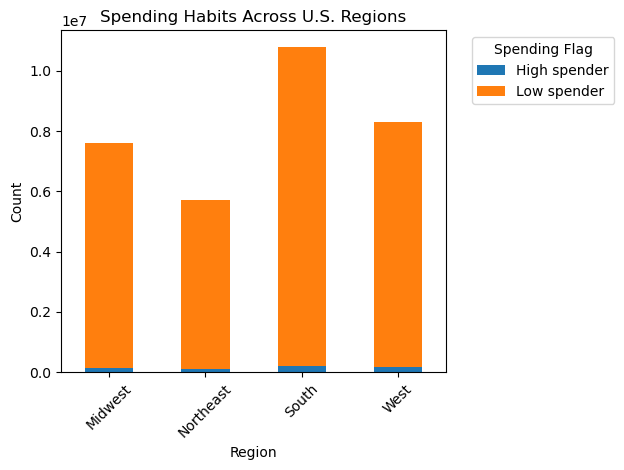

In [8]:
# Group the data by Region and spending_flag and count the occurrences
region_spending_counts = df.groupby(['region', 'spending_flag']).size().unstack(fill_value=0)

# Plot the stacked bar chart
region_spending_counts.plot.bar(stacked=True)

# Add labels and title
plt.title('Spending Habits Across U.S. Regions')
plt.xlabel('Region')
plt.ylabel('Count')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Spending Flag', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend outside the plot
plt.tight_layout()  # Adjust layout to prevent clipping

# Save the plot as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_across_regions.png'))
plt.show()

## Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.

In [9]:
df.loc[df['max_order'] < 5, 'low_activity_flag'] = 'Low activity'

In [10]:
df.loc[df['max_order'] >= 5, 'low_activity_flag'] = 'High activity'

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
pd.set_option('display.max_row', None)

In [13]:
df.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order customer_type  product_id  add_to_cart_order  \
0                     NaN  New Customer         196                  1   
1                     NaN  New Customer       14084                  2   
2                     NaN  New Customer       12427                  3   
3                     NaN  New Customer       26088                  4   
4                     NaN  New Customer       26405                  5   

   reordered                             product_name  aisle_id  \
0          0                                     Soda      77.0   
1          0  Organic Unsweetened Vanilla Almond Milk      91.0   
2          0                      Original Beef Jerky      23.0   
3          0               Aged White Cheddar Popcorn      23.0   
4          0         XL Pick-A-Size Paper Towel Rolls      54.0   

   department_id  prices    price_range_loc     busiest_day    busiest_days  \
0            7.0     9.0  Mid-range product  Regularly busy  Regularly busy   
1           16.0    12.5  Mid-range product  Regularly busy  Regularly busy   
2           19.0     4.4  Low-range product  Regularly busy  Regularly busy   
3           19.0     4.7  Low-range product  Regularly busy  Regularly busy   
4           17.0     1.0  Low-range product  Regularly busy  Regularly busy   

    busiest_hours  max_order  loyalty_flag  average_price spending_flag  \
0  Average orders         10  New customer       6.367797   Low spender   
1  Average orders         10  New customer       6.367797   Low spender   
2  Average orders         10  New customer       6.367797   Low spender   
3  Average orders         10  New customer       6.367797   Low spender   
4  Average orders         10  New customer       6.367797   Low spender   

   median_days_prior_order         frequency_flag  gender    state  age  \
0                     20.5  Non-frequent customer  Female  Alabama   31   
1                     20.5  Non-frequent customer  Female  Alabama   31   
2                     20.5  Non-frequent customer  Female  Alabama   31   
3                     20.5  Non-frequent customer  Female  Alabama   31   
4                     20.5  Non-frequent customer  Female  Alabama   31   

  date_joined  dependants family_status  income _merge region  \
0   2/17/2019           3       married   40423   both  South   
1   2/17/2019           3       married   40423   both  South   
2   2/17/2019           3       married   40423   both  South   
3   2/17/2019           3       married   40423   both  South   
4   2/17/2019           3       married   40423   both  South   

  low_activity_flag  
0     High activity  
1     High activity  
2     High activity  
3     High activity  
4     High activity

In [14]:
df['low_activity_flag'].value_counts(dropna = False)

low_activity_flag
High activity    30993489
Low activity      1441570
Name: count, dtype: int64

In [15]:
df.shape

(32435059, 34)

In [16]:
# exclude low-activity customers
df_filtered = df[df['low_activity_flag'] != 'Low activity']

In [17]:
df_filtered.shape

(30993489, 34)

In [18]:
df_filtered.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order customer_type  product_id  add_to_cart_order  \
0                     NaN  New Customer         196                  1   
1                     NaN  New Customer       14084                  2   
2                     NaN  New Customer       12427                  3   
3                     NaN  New Customer       26088                  4   
4                     NaN  New Customer       26405                  5   

   reordered                             product_name  aisle_id  \
0          0                                     Soda      77.0   
1          0  Organic Unsweetened Vanilla Almond Milk      91.0   
2          0                      Original Beef Jerky      23.0   
3          0               Aged White Cheddar Popcorn      23.0   
4          0         XL Pick-A-Size Paper Towel Rolls      54.0   

   department_id  prices    price_range_loc     busiest_day    busiest_days  \
0            7.0     9.0  Mid-range product  Regularly busy  Regularly busy   
1           16.0    12.5  Mid-range product  Regularly busy  Regularly busy   
2           19.0     4.4  Low-range product  Regularly busy  Regularly busy   
3           19.0     4.7  Low-range product  Regularly busy  Regularly busy   
4           17.0     1.0  Low-range product  Regularly busy  Regularly busy   

    busiest_hours  max_order  loyalty_flag  average_price spending_flag  \
0  Average orders         10  New customer       6.367797   Low spender   
1  Average orders         10  New customer       6.367797   Low spender   
2  Average orders         10  New customer       6.367797   Low spender   
3  Average orders         10  New customer       6.367797   Low spender   
4  Average orders         10  New customer       6.367797   Low spender   

   median_days_prior_order         frequency_flag  gender    state  age  \
0                     20.5  Non-frequent customer  Female  Alabama   31   
1                     20.5  Non-frequent customer  Female  Alabama   31   
2                     20.5  Non-frequent customer  Female  Alabama   31   
3                     20.5  Non-frequent customer  Female  Alabama   31   
4                     20.5  Non-frequent customer  Female  Alabama   31   

  date_joined  dependants family_status  income _merge region  \
0   2/17/2019           3       married   40423   both  South   
1   2/17/2019           3       married   40423   both  South   
2   2/17/2019           3       married   40423   both  South   
3   2/17/2019           3       married   40423   both  South   
4   2/17/2019           3       married   40423   both  South   

  low_activity_flag  
0     High activity  
1     High activity  
2     High activity  
3     High activity  
4     High activity

In [19]:
df_filtered.shape

(30993489, 34)

In [20]:
df_filtered.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_filtered.pkl'))

## Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [21]:
df_dep

Unnamed: 0       department
0            1           frozen
1            2            other
2            3           bakery
3            4          produce
4            5          alcohol
5            6    international
6            7        beverages
7            8             pets
8            9  dry goods pasta
9           10             bulk
10          11    personal care
11          12     meat seafood
12          13           pantry
13          14        breakfast
14          15     canned goods
15          16       dairy eggs
16          17        household
17          18           babies
18          19           snacks
19          20             deli
20          21          missing

In [22]:
# Rename the column
df_dep.rename(columns={'Unnamed: 0': 'department_id'}, inplace=True)

In [23]:
df_dep

department_id       department
0               1           frozen
1               2            other
2               3           bakery
3               4          produce
4               5          alcohol
5               6    international
6               7        beverages
7               8             pets
8               9  dry goods pasta
9              10             bulk
10             11    personal care
11             12     meat seafood
12             13           pantry
13             14        breakfast
14             15     canned goods
15             16       dairy eggs
16             17        household
17             18           babies
18             19           snacks
19             20             deli
20             21          missing

In [24]:
# Delete the "_merge" column
df.drop(columns=['_merge'], inplace=True)

In [25]:
# Merging df and df_dep on 'product_id'
df_merged = df.merge(df_dep, on='department_id', how = 'left')

In [26]:
df_merged['_merge'] = 'both'
df_merged.loc[df_merged['department_id'].isnull(), '_merge'] = 'left_only'

In [27]:
df_merged['_merge'].value_counts()

_merge
both         32404859
left_only       30200
Name: count, dtype: int64

In [28]:
df_merged.shape

(32435059, 35)

In [29]:
df_merged.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order customer_type  product_id  add_to_cart_order  \
0                     NaN  New Customer         196                  1   
1                     NaN  New Customer       14084                  2   
2                     NaN  New Customer       12427                  3   
3                     NaN  New Customer       26088                  4   
4                     NaN  New Customer       26405                  5   

   reordered                             product_name  aisle_id  \
0          0                                     Soda      77.0   
1          0  Organic Unsweetened Vanilla Almond Milk      91.0   
2          0                      Original Beef Jerky      23.0   
3          0               Aged White Cheddar Popcorn      23.0   
4          0         XL Pick-A-Size Paper Towel Rolls      54.0   

   department_id  prices    price_range_loc     busiest_day    busiest_days  \
0            7.0     9.0  Mid-range product  Regularly busy  Regularly busy   
1           16.0    12.5  Mid-range product  Regularly busy  Regularly busy   
2           19.0     4.4  Low-range product  Regularly busy  Regularly busy   
3           19.0     4.7  Low-range product  Regularly busy  Regularly busy   
4           17.0     1.0  Low-range product  Regularly busy  Regularly busy   

    busiest_hours  max_order  loyalty_flag  average_price spending_flag  \
0  Average orders         10  New customer       6.367797   Low spender   
1  Average orders         10  New customer       6.367797   Low spender   
2  Average orders         10  New customer       6.367797   Low spender   
3  Average orders         10  New customer       6.367797   Low spender   
4  Average orders         10  New customer       6.367797   Low spender   

   median_days_prior_order         frequency_flag  gender    state  age  \
0                     20.5  Non-frequent customer  Female  Alabama   31   
1                     20.5  Non-frequent customer  Female  Alabama   31   
2                     20.5  Non-frequent customer  Female  Alabama   31   
3                     20.5  Non-frequent customer  Female  Alabama   31   
4                     20.5  Non-frequent customer  Female  Alabama   31   

  date_joined  dependants family_status  income region low_activity_flag  \
0   2/17/2019           3       married   40423  South     High activity   
1   2/17/2019           3       married   40423  South     High activity   
2   2/17/2019           3       married   40423  South     High activity   
3   2/17/2019           3       married   40423  South     High activity   
4   2/17/2019           3       married   40423  South     High activity   

   department _merge  
0   beverages   both  
1  dairy eggs   both  
2      snacks   both  
3      snacks   both  
4   household   both

## Age Group: Categorize customers into different age groups, such as "Young Adults" (18-35), "Middle-aged Adults" (36-55), and "Seniors" (56+).

In [30]:
# Create a new column for age group
df_merged.loc[df['age'] < 18, 'age_group'] = 'Under 18'

In [31]:
df_merged.loc[(df['age'] >= 18) & (df['age'] <= 35), 'age_group'] = 'Young Adults (18-35)'

In [32]:
df_merged.loc[(df['age'] < 55) & (df['age'] >= 36), 'age_group'] = 'Middle-aged Adults (36-55)'

In [33]:
df_merged.loc[df['age'] > 56, 'age_group'] = 'Seniors (56+)'

In [34]:
df_merged.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order customer_type  product_id  add_to_cart_order  \
0                     NaN  New Customer         196                  1   
1                     NaN  New Customer       14084                  2   
2                     NaN  New Customer       12427                  3   
3                     NaN  New Customer       26088                  4   
4                     NaN  New Customer       26405                  5   

   reordered                             product_name  aisle_id  \
0          0                                     Soda      77.0   
1          0  Organic Unsweetened Vanilla Almond Milk      91.0   
2          0                      Original Beef Jerky      23.0   
3          0               Aged White Cheddar Popcorn      23.0   
4          0         XL Pick-A-Size Paper Towel Rolls      54.0   

   department_id  prices    price_range_loc     busiest_day    busiest_days  \
0            7.0     9.0  Mid-range product  Regularly busy  Regularly busy   
1           16.0    12.5  Mid-range product  Regularly busy  Regularly busy   
2           19.0     4.4  Low-range product  Regularly busy  Regularly busy   
3           19.0     4.7  Low-range product  Regularly busy  Regularly busy   
4           17.0     1.0  Low-range product  Regularly busy  Regularly busy   

    busiest_hours  max_order  loyalty_flag  average_price spending_flag  \
0  Average orders         10  New customer       6.367797   Low spender   
1  Average orders         10  New customer       6.367797   Low spender   
2  Average orders         10  New customer       6.367797   Low spender   
3  Average orders         10  New customer       6.367797   Low spender   
4  Average orders         10  New customer       6.367797   Low spender   

   median_days_prior_order         frequency_flag  gender    state  age  \
0                     20.5  Non-frequent customer  Female  Alabama   31   
1                     20.5  Non-frequent customer  Female  Alabama   31   
2                     20.5  Non-frequent customer  Female  Alabama   31   
3                     20.5  Non-frequent customer  Female  Alabama   31   
4                     20.5  Non-frequent customer  Female  Alabama   31   

  date_joined  dependants family_status  income region low_activity_flag  \
0   2/17/2019           3       married   40423  South     High activity   
1   2/17/2019           3       married   40423  South     High activity   
2   2/17/2019           3       married   40423  South     High activity   
3   2/17/2019           3       married   40423  South     High activity   
4   2/17/2019           3       married   40423  South     High activity   

   department _merge             age_group  
0   beverages   both  Young Adults (18-35)  
1  dairy eggs   both  Young Adults (18-35)  
2      snacks   both  Young Adults (18-35)  
3      snacks   both  Young Adults (18-35)  
4   household   both  Young Adults (18-35)

## Family Status: categorize customers as "Single Parent", "Young Families", or "Empty Nesters", based on the presence of dependants and family status.

In [35]:
# Categorize customers based on family status
df_merged.loc[(df_merged['dependants'] >= 1) & ((df_merged['family_status'] == 'single') | (df_merged['family_status'] == 'divorced/widowed')), 'family_group'] = 'Single Parent'

In [36]:
df_merged.loc[(df_merged['dependants'] >= 1) & (df_merged['dependants'] < 3) & (df_merged['family_status'] == 'married'), 'family_group'] = 'Young Families'

In [37]:
df_merged.loc[(df_merged['dependants'] == 0) & (df_merged['family_status'] == 'married'), 'family_group'] = 'Empty Nesters'

In [38]:
df_merged.loc[(df_merged['dependants'] >= 3) & (df_merged['family_status'] == 'married'), 'family_group'] = 'Large Families'

In [39]:
df_merged.loc[(df_merged['dependants'] == 0) & ((df_merged['family_status'] == 'single') | (df_merged['family_status'] == 'divorced/widowed')), 'family_group'] = 'Single'

In [40]:
df_merged.loc[(df_merged['dependants'] >= 1) & (df_merged['family_status'] == 'living with parents and siblings'), 'family_group'] = 'Single Parent living with parents and siblings '

In [41]:
df_merged.loc[(df_merged['dependants'] == 0) & (df_merged['family_status'] == 'living with parents and siblings'), 'family_group'] = 'Living with parents and siblings no children '

In [42]:
df_merged['family_group'].value_counts(dropna = False)

family_group
Young Families                                     15148024
Single                                              8105345
Large Families                                      7629475
Single Parent living with parents and siblings      1552215
Name: count, dtype: int64

In [43]:
df_merged['dependants'].value_counts(dropna = False)

dependants
3    8142515
0    8105345
2    8098734
1    8088465
Name: count, dtype: int64

In [44]:
df_merged['family_status'].value_counts(dropna = False)

family_status
married                             22777499
single                               5330885
divorced/widowed                     2774460
living with parents and siblings     1552215
Name: count, dtype: int64

In [45]:
df_merged.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order customer_type  product_id  add_to_cart_order  \
0                     NaN  New Customer         196                  1   
1                     NaN  New Customer       14084                  2   
2                     NaN  New Customer       12427                  3   
3                     NaN  New Customer       26088                  4   
4                     NaN  New Customer       26405                  5   

   reordered                             product_name  aisle_id  \
0          0                                     Soda      77.0   
1          0  Organic Unsweetened Vanilla Almond Milk      91.0   
2          0                      Original Beef Jerky      23.0   
3          0               Aged White Cheddar Popcorn      23.0   
4          0         XL Pick-A-Size Paper Towel Rolls      54.0   

   department_id  prices    price_range_loc     busiest_day    busiest_days  \
0            7.0     9.0  Mid-range product  Regularly busy  Regularly busy   
1           16.0    12.5  Mid-range product  Regularly busy  Regularly busy   
2           19.0     4.4  Low-range product  Regularly busy  Regularly busy   
3           19.0     4.7  Low-range product  Regularly busy  Regularly busy   
4           17.0     1.0  Low-range product  Regularly busy  Regularly busy   

    busiest_hours  max_order  loyalty_flag  average_price spending_flag  \
0  Average orders         10  New customer       6.367797   Low spender   
1  Average orders         10  New customer       6.367797   Low spender   
2  Average orders         10  New customer       6.367797   Low spender   
3  Average orders         10  New customer       6.367797   Low spender   
4  Average orders         10  New customer       6.367797   Low spender   

   median_days_prior_order         frequency_flag  gender    state  age  \
0                     20.5  Non-frequent customer  Female  Alabama   31   
1                     20.5  Non-frequent customer  Female  Alabama   31   
2                     20.5  Non-frequent customer  Female  Alabama   31   
3                     20.5  Non-frequent customer  Female  Alabama   31   
4                     20.5  Non-frequent customer  Female  Alabama   31   

  date_joined  dependants family_status  income region low_activity_flag  \
0   2/17/2019           3       married   40423  South     High activity   
1   2/17/2019           3       married   40423  South     High activity   
2   2/17/2019           3       married   40423  South     High activity   
3   2/17/2019           3       married   40423  South     High activity   
4   2/17/2019           3       married   40423  South     High activity   

   department _merge             age_group    family_group  
0   beverages   both  Young Adults (18-35)  Large Families  
1  dairy eggs   both  Young Adults (18-35)  Large Families  
2      snacks   both  Young Adults (18-35)  Large Families  
3      snacks   both  Young Adults (18-35)  Large Families  
4   household   both  Young Adults (18-35)  Large Families

## Create an appropriate visualization to show the distribution of profiles.

In [46]:
# Group the data by Region and spending_flag and count the occurrences
family_group_spending_counts = df_merged.groupby(['family_group', 'spending_flag']).size().unstack(fill_value=0)

# Plot the stacked bar chart
family_group_spending_counts.plot.bar(stacked=True)

# Add title
plt.title('Spending distribution of profiles')

# Show the plot
plt.legend(title='Spending Flag', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend outside the plot
plt.tight_layout()  # Adjust layout to prevent clipping

# Save the plot as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_profiles.png'))
plt.show()

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [47]:
df_merged.groupby('family_group').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                                                        mean min max
family_group                                                        
Large Families                                     17.110884   1  99
Single                                             17.264774   1  99
Single Parent living with parents and siblings     17.296007   1  99
Young Families                                     17.076081   1  99

In [48]:
df_merged.groupby('family_group').agg({'prices': ['mean', 'min', 'max']})

prices              
                                                      mean  min      max
family_group                                                            
Large Families                                   11.813774  1.0  99999.0
Single                                           12.129243  1.0  99999.0
Single Parent living with parents and siblings   10.828768  1.0  99999.0
Young Families                                   12.102307  1.0  99999.0

## Compare your customer profiles with regions and departments. 

In [49]:
# Group the data by customer profiles, regions, and departments
grouped_data = df_merged.groupby(['family_group', 'region', 'department'])

In [50]:
# Aggregate relevant metrics within each group
agg_data = grouped_data.agg({
    'order_id': 'count',  # Count of orders as a measure of order frequency
    'prices': 'sum'       # Total expenditure as a measure of expenditure
})

In [51]:
# Rename the columns for clarity
agg_data.columns = ['order_count', 'total_expenditure']

In [52]:
# Reset index to flatten the DataFrame
agg_data.reset_index(inplace=True)

In [53]:
agg_data.head()

family_group   region department  order_count  total_expenditure
0  Large Families  Midwest    alcohol         7812            63632.4
1  Large Families  Midwest     babies        22727           173273.2
2  Large Families  Midwest     bakery        62176           492368.7
3  Large Families  Midwest  beverages       142531          1095927.9
4  Large Families  Midwest  breakfast        37506           304348.5

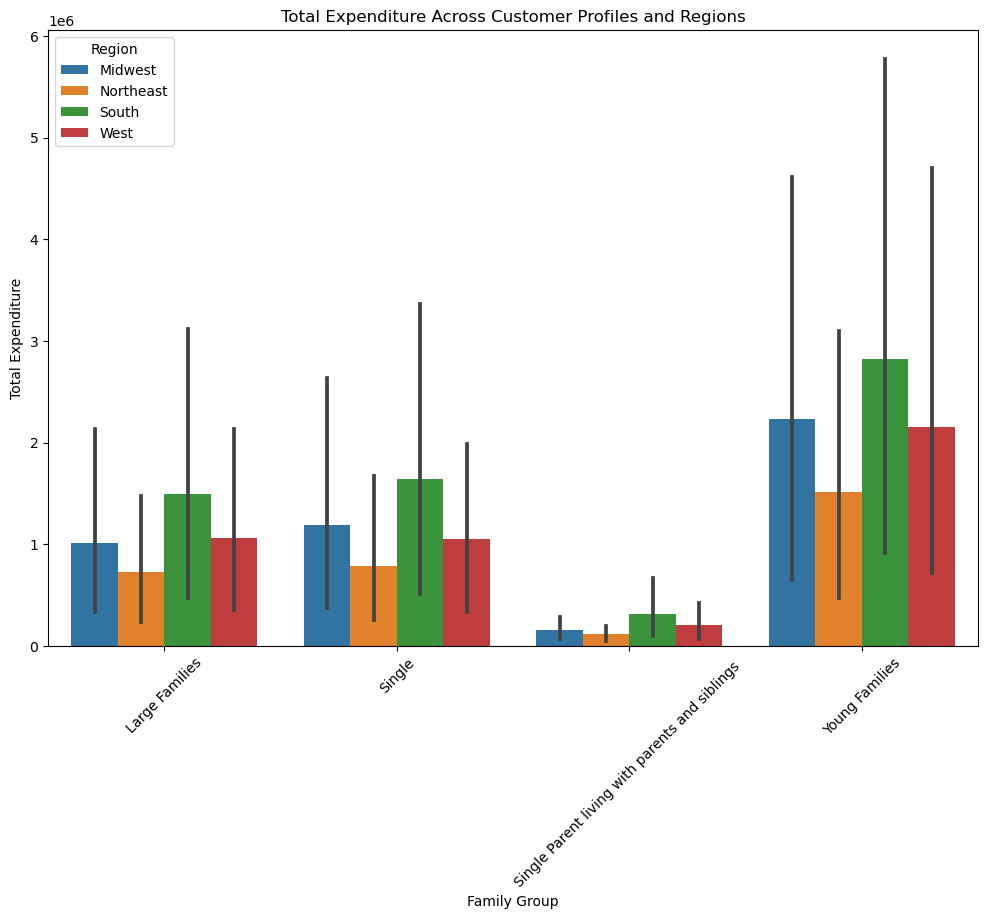

In [54]:
# Bar chart comparing metrics across different customer profiles
plt.figure(figsize=(12, 8))
sns.barplot(data=agg_data, x='family_group', y='total_expenditure', hue='region')
plt.title('Total Expenditure Across Customer Profiles and Regions')
plt.xlabel('Family Group')
plt.ylabel('Total Expenditure')
plt.xticks(rotation=45)
plt.legend(title='Region')

# Save the plot as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'expenditure_profiles_regions.png'))
plt.show()

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


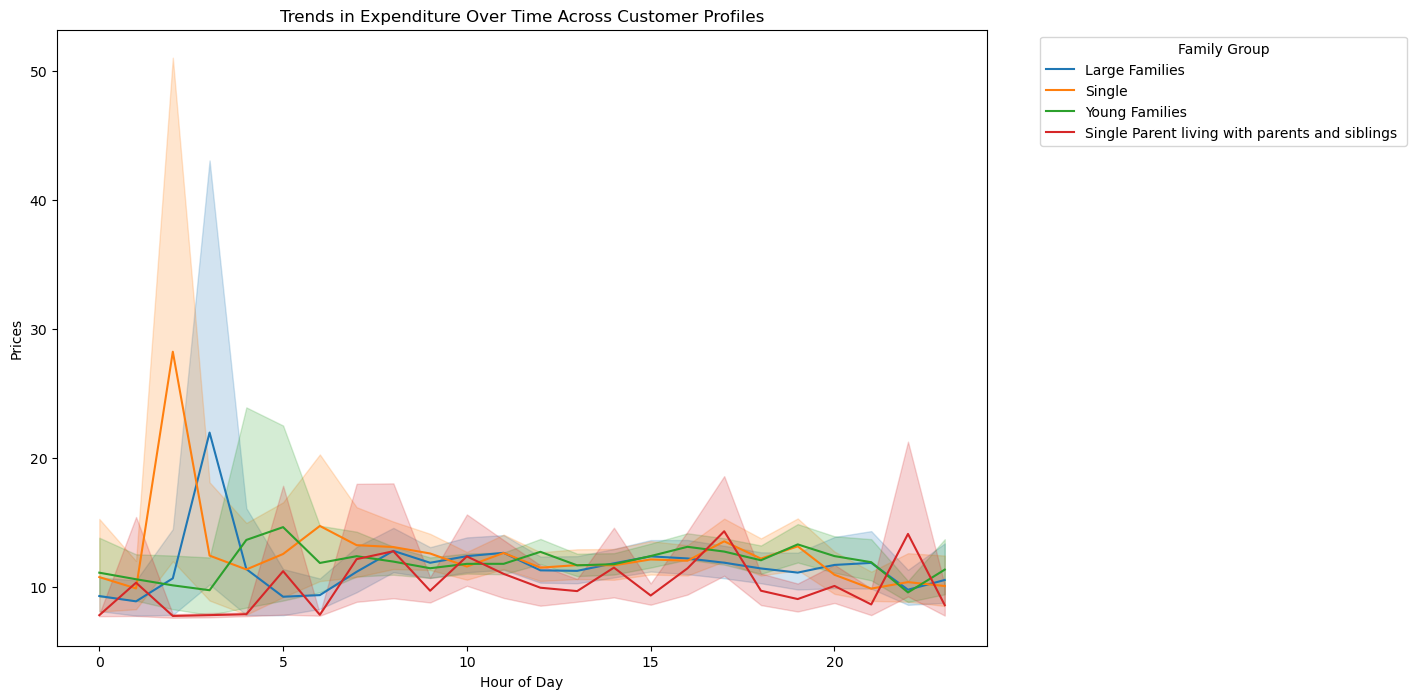

In [55]:
# Line plot analyzing trends over time within each customer profile and department
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_merged, x='order_hour_of_day', y='prices', hue='family_group')
plt.title('Trends in Expenditure Over Time Across Customer Profiles')
plt.xlabel('Hour of Day')
plt.ylabel('Prices')
plt.legend(title='Family Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'expenditure_time_profiles.png'))
plt.show()

/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mariazaremba/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


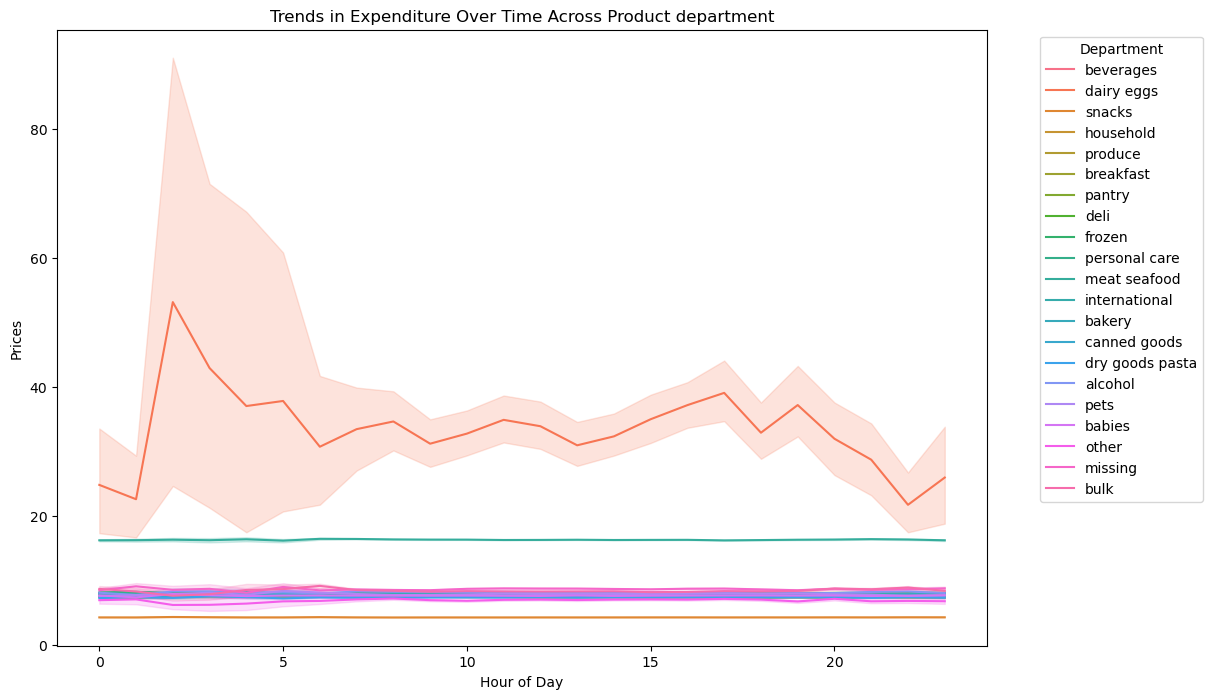

In [56]:
# Line plot analyzing trends over time within each customer profile and department
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_merged, x='order_hour_of_day', y='prices', hue='department')
plt.title('Trends in Expenditure Over Time Across Product department')
plt.xlabel('Hour of Day')
plt.ylabel('Prices')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot as an image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'expenditure_time_department.png'))
plt.show()

### Based on the analysis, it appears that there is a link between customer profiles, regions, and departments. Specifically, it was observed that the most expensive orders are made by two distinct customer profiles: single adults and large families. These orders predominantly consist of products from the "dairy and eggs" department. Furthermore, these high-value orders are typically placed during the early hours of the morning, specifically between 2-4 am.

In [58]:
# Export data to pkl
df_merged.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_merged_exercise_4_10.pkl'))